# Analyse de l'Erreur Quadratique Moyenne (MSE)
## 1. Importation des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, simplify, hessian, Matrix
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration pour l'affichage

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Expression mathématique et gradient de la MSE

In [4]:
# Définition des symboles
y_true, y_pred, n = symbols('y_true y_pred n')
m = symbols('m')  # nombre d'échantillons

# Expression de la MSE pour un échantillon
mse_single = (y_true - y_pred)**2

# Expression de la MSE pour multiple échantillons
mse_total = (1/m) * sp.Sum((y_true - y_pred)**2, (m, 1, m))

print("=== EXPRESSIONS MATHEMATIQUES DE LA MSE ===")
print(f"MSE pour un échantillon: {mse_single}")
print(f"MSE pour multiple échantillons: {mse_total}")

# %%
# Calcul du gradient pour un échantillon
grad_mse_single = diff(mse_single, y_pred)
print("\n=== GRADIENT DE LA MSE ===")
print(f"Gradient pour un échantillon: {grad_mse_single}")
print(f"Forme simplifiée: {simplify(grad_mse_single)}")

=== EXPRESSIONS MATHEMATIQUES DE LA MSE ===
MSE pour un échantillon: (-y_pred + y_true)**2
MSE pour multiple échantillons: Sum((-y_pred + y_true)**2, (m, 1, m))/m

=== GRADIENT DE LA MSE ===
Gradient pour un échantillon: 2*y_pred - 2*y_true
Forme simplifiée: 2*y_pred - 2*y_true


## 3. Étude de la convexité

=== ANALYSE DE CONVEXITE ===
Dérivée seconde: 2
✓ La MSE est STRICTEMENT CONVEXE (dérivée seconde > 0)


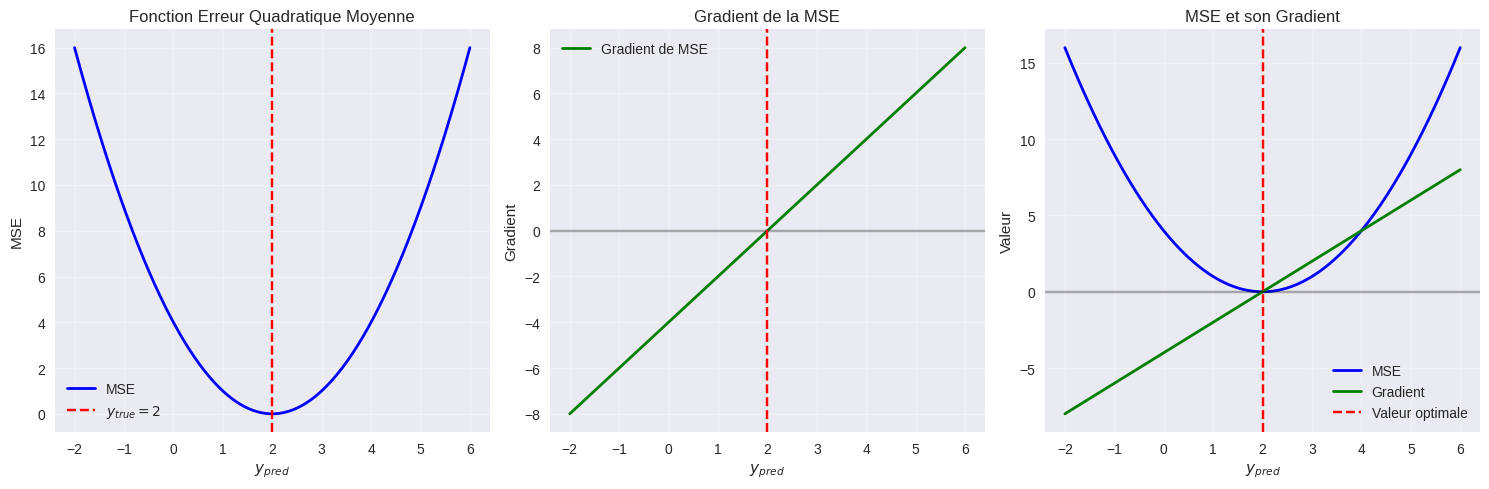

In [5]:
# Calcul de la dérivée seconde
second_derivative = diff(mse_single, y_pred, 2)
print("=== ANALYSE DE CONVEXITE ===")
print(f"Dérivée seconde: {second_derivative}")

# Analyse de la convexité
if second_derivative > 0:
    print("✓ La MSE est STRICTEMENT CONVEXE (dérivée seconde > 0)")
else:
    print("✗ La MSE n'est pas convexe")

# %%
# Visualisation de la fonction MSE et sa dérivée
y_true_val = 2  # valeur fixe pour y_true
y_pred_vals = np.linspace(-2, 6, 400)
mse_vals = (y_true_val - y_pred_vals)**2
grad_vals = -2 * (y_true_val - y_pred_vals)

plt.figure(figsize=(15, 5))

# Plot de la MSE
plt.subplot(1, 3, 1)
plt.plot(y_pred_vals, mse_vals, 'b-', linewidth=2, label='MSE')
plt.axvline(x=y_true_val, color='r', linestyle='--', label=f'$y_{{true}} = {y_true_val}$')
plt.xlabel('$y_{pred}$')
plt.ylabel('MSE')
plt.title('Fonction Erreur Quadratique Moyenne')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot du gradient
plt.subplot(1, 3, 2)
plt.plot(y_pred_vals, grad_vals, 'g-', linewidth=2, label='Gradient de MSE')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=y_true_val, color='r', linestyle='--')
plt.xlabel('$y_{pred}$')
plt.ylabel('Gradient')
plt.title('Gradient de la MSE')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot combiné
plt.subplot(1, 3, 3)
plt.plot(y_pred_vals, mse_vals, 'b-', linewidth=2, label='MSE')
plt.plot(y_pred_vals, grad_vals, 'g-', linewidth=2, label='Gradient')
plt.axvline(x=y_true_val, color='r', linestyle='--', label='Valeur optimale')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('Valeur')
plt.title('MSE et son Gradient')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ## 4. Création d'un jeu de données pour la régression


=== JEU DE DONNEES REGRESSION ===
Forme de X: (80, 2)
Forme de y: (80,)
Nombre d'échantillons: 80
Nombre de caractéristiques: 2


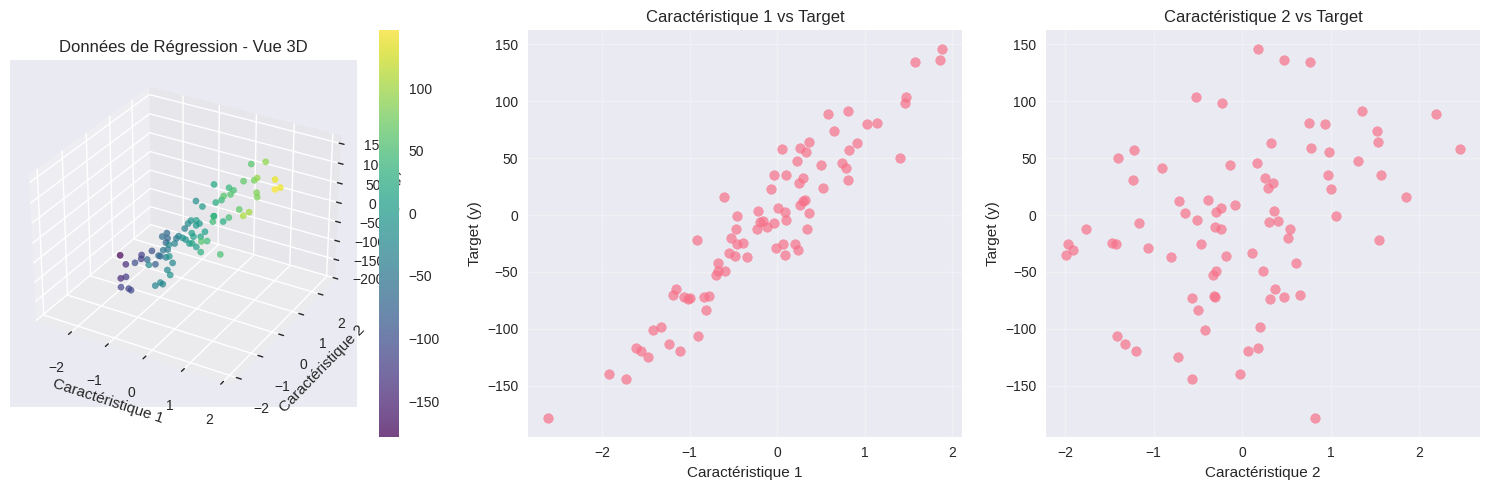

In [6]:
# Génération d'un jeu de données synthétique pour la régression
np.random.seed(42)
n_samples = 80

# Création de données avec 2 caractéristiques
X, y = make_regression(n_samples=n_samples, n_features=2, noise=10, random_state=42)

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== JEU DE DONNEES REGRESSION ===")
print(f"Forme de X: {X.shape}")
print(f"Forme de y: {y.shape}")
print(f"Nombre d'échantillons: {n_samples}")
print(f"Nombre de caractéristiques: {X.shape[1]}")

# %%
# Affichage des données
fig = plt.figure(figsize=(15, 5))

# Plot 3D des données
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', alpha=0.7)
ax1.set_xlabel('Caractéristique 1')
ax1.set_ylabel('Caractéristique 2')
ax1.set_zlabel('Target (y)')
ax1.set_title('Données de Régression - Vue 3D')
plt.colorbar(scatter, ax=ax1)

# Plot 2D - Caractéristique 1 vs Target
plt.subplot(132)
plt.scatter(X[:, 0], y, alpha=0.7)
plt.xlabel('Caractéristique 1')
plt.ylabel('Target (y)')
plt.title('Caractéristique 1 vs Target')
plt.grid(True, alpha=0.3)

# Plot 2D - Caractéristique 2 vs Target
plt.subplot(133)
plt.scatter(X[:, 1], y, alpha=0.7)
plt.xlabel('Caractéristique 2')
plt.ylabel('Target (y)')
plt.title('Caractéristique 2 vs Target')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Courbes de la fonction MSE sur les données réelles

MSE sur le jeu de test: 115.0260


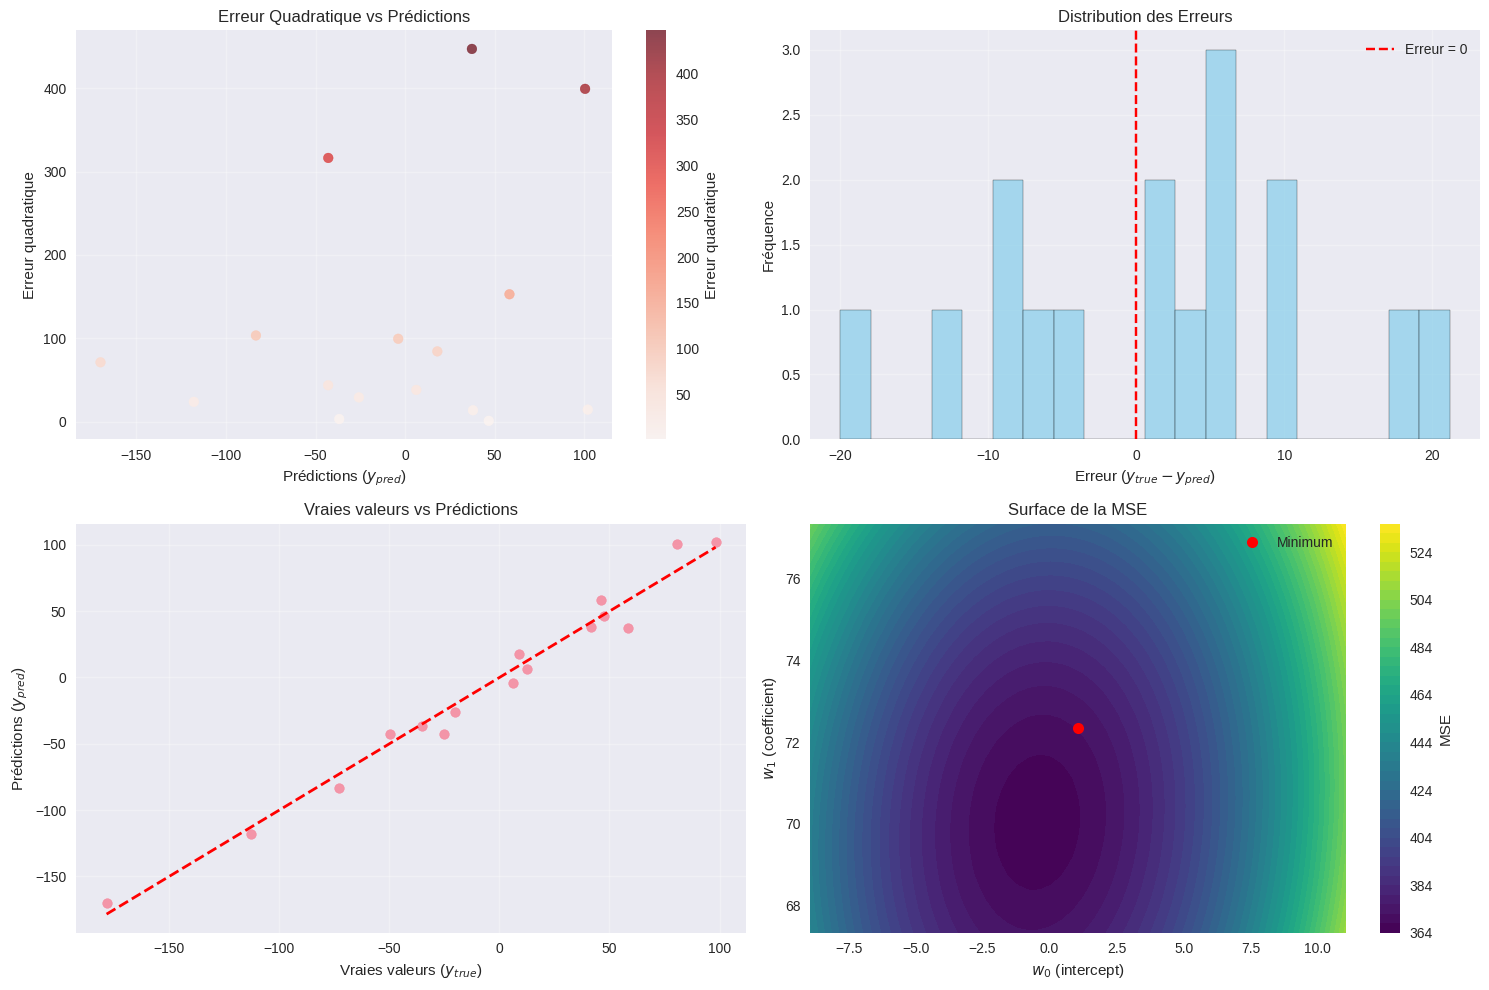

In [7]:
# Entraînement d'un modèle linéaire pour obtenir des prédictions
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcul de la MSE
mse_value = mean_squared_error(y_test, y_pred)
print(f"MSE sur le jeu de test: {mse_value:.4f}")

# %%
# Visualisation de la MSE pour différentes prédictions
plt.figure(figsize=(15, 10))

# Graphique 1: MSE vs prédictions individuelles
plt.subplot(2, 2, 1)
errors = y_test - y_pred
mse_points = errors**2
plt.scatter(y_pred, mse_points, alpha=0.7, c=mse_points, cmap='Reds')
plt.xlabel('Prédictions ($y_{pred}$)')
plt.ylabel('Erreur quadratique')
plt.title('Erreur Quadratique vs Prédictions')
plt.colorbar(label='Erreur quadratique')
plt.grid(True, alpha=0.3)

# Graphique 2: Distribution des erreurs
plt.subplot(2, 2, 2)
plt.hist(errors, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Erreur ($y_{true} - y_{pred}$)')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs')
plt.axvline(x=0, color='red', linestyle='--', label='Erreur = 0')
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 3: Vraies valeurs vs prédictions
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Vraies valeurs ($y_{true}$)')
plt.ylabel('Prédictions ($y_{pred}$)')
plt.title('Vraies valeurs vs Prédictions')
plt.grid(True, alpha=0.3)

# Graphique 4: Surface de la MSE pour un modèle simple
plt.subplot(2, 2, 4)
# Simulation d'une MSE surface pour une régression simple
w0_vals = np.linspace(model.intercept_ - 10, model.intercept_ + 10, 50)
w1_vals = np.linspace(model.coef_[0] - 5, model.coef_[0] + 5, 50)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Calcul de la MSE pour différentes combinaisons de paramètres
mse_surface = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        y_pred_temp = W0[i, j] + X_test[:, 0] * W1[i, j]
        mse_surface[i, j] = mean_squared_error(y_test, y_pred_temp)

contour = plt.contourf(W0, W1, mse_surface, levels=50, cmap='viridis')
plt.colorbar(contour, label='MSE')
plt.xlabel('$w_0$ (intercept)')
plt.ylabel('$w_1$ (coefficient)')
plt.title('Surface de la MSE')
plt.plot(model.intercept_, model.coef_[0], 'ro', markersize=8, label='Minimum')
plt.legend()

plt.tight_layout()
plt.show()


## 6. Visualisation 3D de la surface de la MSE

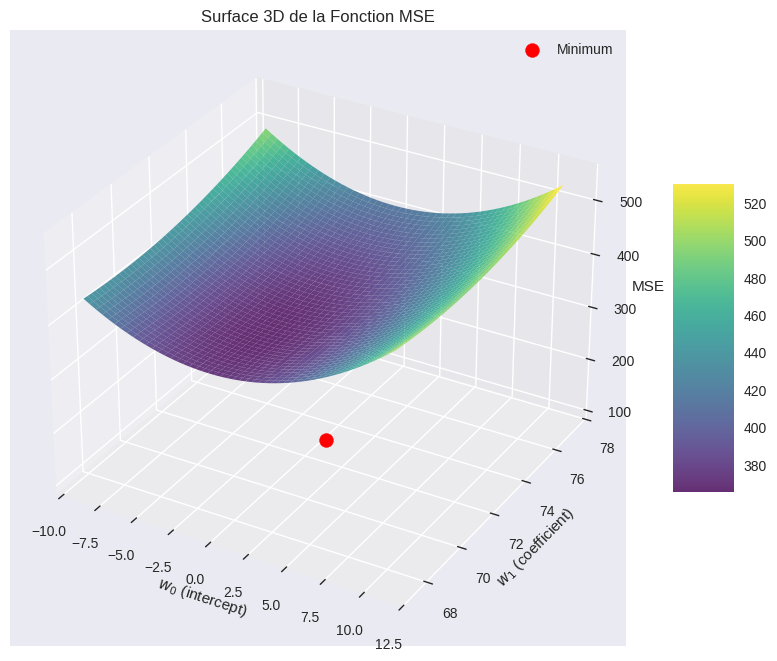

In [8]:
# Visualisation 3D interactive de la surface de la MSE
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(W0, W1, mse_surface, cmap='viridis', 
                      alpha=0.8, antialiased=True)

ax.set_xlabel('$w_0$ (intercept)')
ax.set_ylabel('$w_1$ (coefficient)')
ax.set_zlabel('MSE')
ax.set_title('Surface 3D de la Fonction MSE')

# Point optimal
ax.scatter([model.intercept_], [model.coef_[0]], [mse_value], 
          color='red', s=100, label='Minimum')

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.legend()
plt.show()


## 7. Tangente à l'ellipse (application géométrique)

=== TANGENTE A L'ELLIPSE ===
Ellipse: x²/3² + y²/2² = 1
Point de tangence: (2.00, 1.49)
Équation de la tangente: y = -0.60(x - 2.00) + 1.49


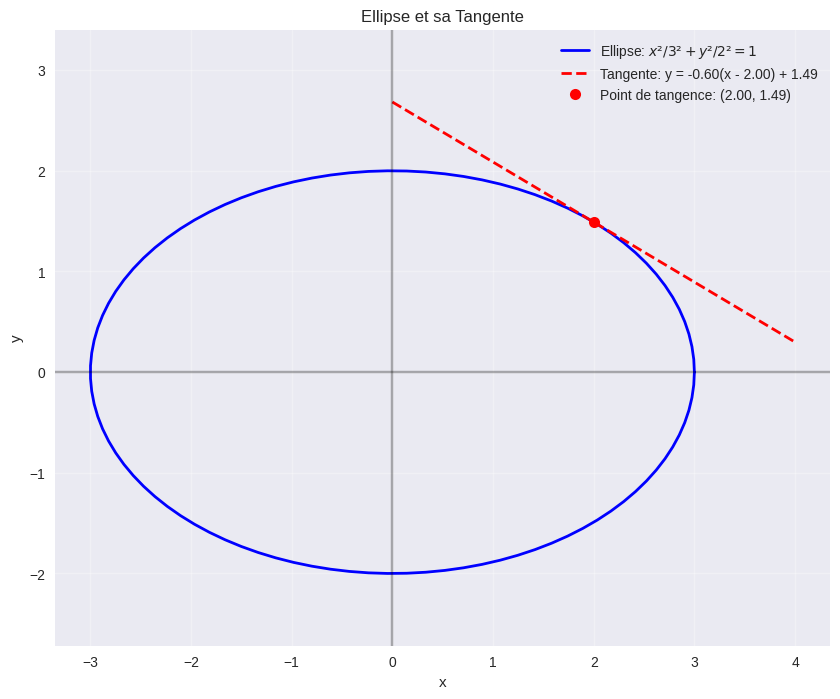

In [9]:
# Création d'une ellipse et calcul de la tangente
def ellipse_tangent(a, b, x0, y0):
    """
    Calcule l'équation de la tangente à une ellipse au point (x0, y0)
    Ellipse: x²/a² + y²/b² = 1
    """
    # Vérification que le point est sur l'ellipse
    if abs((x0**2)/(a**2) + (y0**2)/(b**2) - 1) > 1e-6:
        print(f"Le point ({x0}, {y0}) n'est pas sur l'ellipse")
        return None
    
    # Calcul de la pente de la tangente
    if y0 != 0:
        m = -(b**2 * x0) / (a**2 * y0)
        equation = f"y = {m:.2f}(x - {x0:.2f}) + {y0:.2f}"
    else:
        equation = f"x = {x0:.2f}"  # Tangente verticale
    
    return m, equation

# %%
# Application avec une ellipse spécifique
a, b = 3, 2  # demi-axes de l'ellipse
x0, y0 = 2, np.sqrt((1 - (2**2)/(3**2)) * (2**2))  # point sur l'ellipse

m, tangent_eq = ellipse_tangent(a, b, x0, y0)

print("=== TANGENTE A L'ELLIPSE ===")
print(f"Ellipse: x²/{a}² + y²/{b}² = 1")
print(f"Point de tangence: ({x0:.2f}, {y0:.2f})")
print(f"Équation de la tangente: {tangent_eq}")

# %%
# Visualisation de l'ellipse et sa tangente
theta = np.linspace(0, 2*np.pi, 100)
x_ellipse = a * np.cos(theta)
y_ellipse = b * np.sin(theta)

# Points pour la tangente
if m is not None:
    x_tangent = np.linspace(x0 - 2, x0 + 2, 50)
    y_tangent = m * (x_tangent - x0) + y0
else:
    x_tangent = [x0] * 50
    y_tangent = np.linspace(y0 - 2, y0 + 2, 50)

plt.figure(figsize=(10, 8))
plt.plot(x_ellipse, y_ellipse, 'b-', linewidth=2, label=f'Ellipse: $x²/{a}² + y²/{b}² = 1$')
plt.plot(x_tangent, y_tangent, 'r--', linewidth=2, label=f'Tangente: {tangent_eq}')
plt.plot(x0, y0, 'ro', markersize=8, label=f'Point de tangence: ({x0:.2f}, {y0:.2f})')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ellipse et sa Tangente')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## 8. Propriétés importantes de la MSE

In [10]:
# %%
print("=== PROPRIETES DE LA MSE ===")
print("✓ Convexe et différentiable partout")
print("✓ Minimum global unique")
print("✓ Pénalise fortement les grandes erreurs (quadratique)")
print("✓ Sensible aux outliers")
print("✓ Gradient: ∇MSE = -2(y_true - y_pred)")
print("✓ Dérivée seconde: 2 > 0 → strictement convexe")

# %%
# Démonstration de la sensibilité aux outliers
y_clean = np.array([1, 2, 3, 4, 5])
y_pred_clean = np.array([1.1, 1.9, 3.2, 3.8, 5.1])
y_with_outlier = np.array([1, 2, 3, 4, 15])  # dernier point est un outlier

mse_clean = mean_squared_error(y_clean, y_pred_clean)
mse_outlier = mean_squared_error(y_with_outlier, y_pred_clean)

print(f"\n=== SENSIBILITE AUX OUTLIERS ===")
print(f"MSE sans outlier: {mse_clean:.4f}")
print(f"MSE avec outlier: {mse_outlier:.4f}")
print(f"Augmentation: {((mse_outlier - mse_clean) / mse_clean * 100):.1f}%")


=== PROPRIETES DE LA MSE ===
✓ Convexe et différentiable partout
✓ Minimum global unique
✓ Pénalise fortement les grandes erreurs (quadratique)
✓ Sensible aux outliers
✓ Gradient: ∇MSE = -2(y_true - y_pred)
✓ Dérivée seconde: 2 > 0 → strictement convexe

=== SENSIBILITE AUX OUTLIERS ===
MSE sans outlier: 0.0220
MSE avec outlier: 19.6220
Augmentation: 89090.9%


## 9. Conclusion

In [11]:
# %%
print("=== SYNTHESE SUR LA MSE ===")
print("""
La Erreur Quadratique Moyenne (MSE) est une fonction de perte fondamentale 
en apprentissage automatique, particulièrement pour les problèmes de régression.

CARACTERISTIQUES PRINCIPALES:
• Forme: (1/n) * Σ(y_true - y_pred)²
• Gradient: -2(y_true - y_pred)
• Convexité: Strictement convexe (dérivée seconde = 2 > 0)
• Avantages: Différentiable, minimum global unique
• Inconvénients: Sensible aux outliers

UTILISATION:
La MSE est idéale pour les problèmes de régression où les erreurs sont 
normalement distribuées et où les outliers ne sont pas un problème majeur.
""")

=== SYNTHESE SUR LA MSE ===

La Erreur Quadratique Moyenne (MSE) est une fonction de perte fondamentale 
en apprentissage automatique, particulièrement pour les problèmes de régression.

CARACTERISTIQUES PRINCIPALES:
• Forme: (1/n) * Σ(y_true - y_pred)²
• Gradient: -2(y_true - y_pred)
• Convexité: Strictement convexe (dérivée seconde = 2 > 0)
• Avantages: Différentiable, minimum global unique
• Inconvénients: Sensible aux outliers

UTILISATION:
La MSE est idéale pour les problèmes de régression où les erreurs sont 
normalement distribuées et où les outliers ne sont pas un problème majeur.

